In [ ]:
import cv2
import numpy as np
from tensorflow import keras
from keras import layers
from matplotlib import pyplot as plt
%matplotlib inline
from tqdm import tqdm

In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train  = x_train/255
x_test = x_test/255
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
num_classes = 10

In [ ]:
inputImg = layers.Input(shape=(28,28,1),name="inputLayer",dtype="float")

x=layers.Conv2D(16,(3,3),activation="relu",padding="same")(inputImg)
x=layers.AveragePooling2D((2,2))(x)
x=layers.BatchNormalization()(x)

x=layers.Conv2D(32,(3,3),activation="relu",padding="same")(x)
x=layers.AveragePooling2D((2,2))(x)
x=layers.BatchNormalization()(x)

x=layers.Conv2D(8,(3,3),activation="relu",padding="same")(x)
x=layers.AveragePooling2D((2,2))(x)
x=layers.BatchNormalization()(x)

x=layers.Flatten()(x)
x=layers.Dense(64,activation="relu")(x)
x=layers.Dropout(0.3)(x)
x=layers.Dense(128,activation="relu")(x)
x=layers.Dropout(0.3)(x)
encoded = layers.Dense(64,activation="sigmoid")(x)
x=layers.Dense(128,activation="relu")(encoded)
x=layers.Dropout(0.3)(x)
x=layers.Dense(64,activation="relu")(x)
x=layers.Dropout(0.3)(x)

x=layers.Dense(392,activation="relu")(x)

x=layers.Reshape((7,7,8))(x)

x=layers.Conv2D(32,(3,3),activation="relu",padding="same")(x)
x=layers.UpSampling2D((2,2))(x)
x=layers.BatchNormalization()(x)

x=layers.Conv2D(32,(3,3),activation="relu",padding="same")(x)
x=layers.UpSampling2D((2,2))(x)
x=layers.BatchNormalization()(x)

out=layers.Conv2D(1,(3,3),activation="sigmoid",padding="same")(x)

model = keras.Model(inputImg,out)
model.compile(loss="mean_absolute_error",optimizer="adam")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (InputLayer)     [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 16)       0         
 ooling2D)                                                       
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 average_pooling2d_1 (Averag  (None, 7, 7, 32)         0     

In [ ]:
x_train_low=[]
for i in tqdm(range(len(x_train))):
  img=cv2.resize(x_train[i],(10,10))  
  img=cv2.resize(img,(28,28))
  x_train_low.append(img)

x_train_low = np.array(x_train_low)

100%|██████████| 60000/60000 [00:00<00:00, 78386.02it/s]


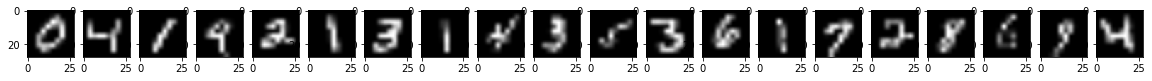

In [ ]:
n=20
plt.figure(figsize=(20,4))
for i in range(1,n+1):
  ax = plt.subplot(2,n,i)
  plt.imshow(x_train_low[i].reshape(28,28),cmap="gray")

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint("model-{epoch:03d}-{loss}-{val_loss}.h5",save_best_only=True)
model.fit(x_train_low,x_train,epochs=20,batch_size=20,validation_split=0.1,callbacks=[checkpoint])

Epoch 1/20
2700/2700 [==============================] - 35s 10ms/step - loss: 0.1046 - val_loss: 0.0781
Epoch 2/20
2700/2700 [==============================] - 26s 10ms/step - loss: 0.0829 - val_loss: 0.0700
Epoch 3/20
2700/2700 [==============================] - 26s 10ms/step - loss: 0.0792 - val_loss: 0.0668
Epoch 4/20
2700/2700 [==============================] - 26s 9ms/step - loss: 0.0771 - val_loss: 0.0660
Epoch 5/20
2700/2700 [==============================] - 26s 9ms/step - loss: 0.0759 - val_loss: 0.0641
Epoch 6/20
2700/2700 [==============================] - 26s 10ms/step - loss: 0.0748 - val_loss: 0.0634
Epoch 7/20
2700/2700 [==============================] - 26s 10ms/step - loss: 0.0739 - val_loss: 0.0628
Epoch 8/20
2700/2700 [==============================] - 26s 10ms/step - loss: 0.0732 - val_loss: 0.0617
Epoch 9/20
2700/2700 [==============================] - 26s 9ms/step - loss: 0.0725 - val_loss: 0.0624
Epoch 10/20
2700/2700 [==============================] - 26s 10ms/s

In [ ]:
pred_train = model.predict(x_train_low)

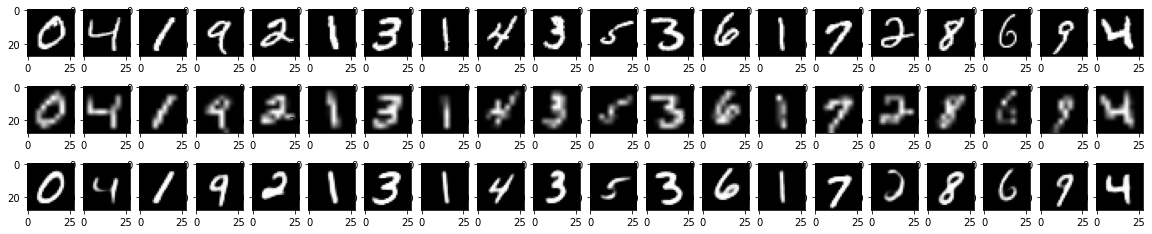

In [ ]:
n=20
plt.figure(figsize=(20,4))
for i in range(1,n+1):
  ax = plt.subplot(3,n,i)
  plt.imshow(x_train[i].reshape(28,28),cmap="gray")
  ax = plt.subplot(3,n,i+n)
  plt.imshow(x_train_low[i].reshape(28,28),cmap="gray")
  ax = plt.subplot(3,n,i+n+n)
  plt.imshow(pred_train[i].reshape(28,28),cmap="gray")

In [ ]:
x_test_low=[]
for i in tqdm(range(len(x_test))):
  img=cv2.resize(x_test[i],(10,10))  
  img=cv2.resize(img,(28,28))
  x_test_low.append(img)

x_test_low = np.array(x_test_low)

100%|██████████| 10000/10000 [00:00<00:00, 111827.83it/s]


In [ ]:
pred_test = model.predict(x_test_low)

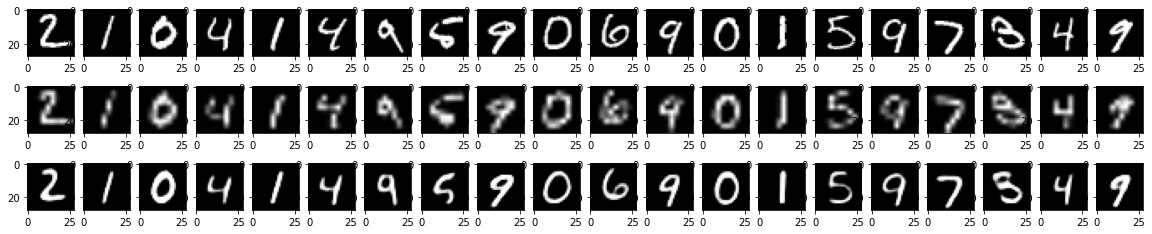

In [ ]:
n=20
plt.figure(figsize=(20,4))
for i in range(1,n+1):
  ax = plt.subplot(3,n,i)
  plt.imshow(x_test[i].reshape(28,28),cmap="gray")
  ax = plt.subplot(3,n,i+n)
  plt.imshow(x_test_low[i].reshape(28,28),cmap="gray")
  ax = plt.subplot(3,n,i+n+n)
  plt.imshow(pred_test[i].reshape(28,28),cmap="gray")